In [1]:
import functions as fnc
import numpy as np
import sys
import verde as vd
from choclo.point import gravity_u as pointgrav
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Forward modelling of ellipsoids:
## 1. Visualising the body

Forward modelling of ellipsoidal bodies initally requires defining the body by the semi axes, denoted here as 'a', 'b' and 'c'. The relationship between these values also defines the class of ellipsoid: a > b > c is a trixial ellipsoid, a > b = c is a prolate, and a < b = c is an oblate. 

The second consideration is the rotation of the body within some defined coordinate system. We assume this 'global' coordinate system to be easting, northing and upward, with the spatial extent defined by the user.

In [2]:
# setup parameters used throughout plots

# semiaxes lengths
a, b, c = (15, 10, 5) # triaxial ellipsoid

#Euler rotation angles
yaw, pitch, roll = 30, 60, 0

# origin of the ellipsoid in the coordinate system
centre = (0, 0, 0)

# create triaxial ellipsoids
triaxial_example = fnc.TriaxialEllipsoid(a, b, c, yaw, pitch, roll, centre)
triaxial_example2 = fnc.TriaxialEllipsoid(a, b, c, yaw, pitch, roll, centre)

# define coordinate grid (2D grid) at surface height
# extra_coords defines the surface height - here, this is 5 units above the origin height of the ellipsoid
coordinates = vd.grid_coordinates(region = (-20, 20, -20, 20), spacing = 0.5, extra_coords = 5)

<IPython.core.display.Javascript object>


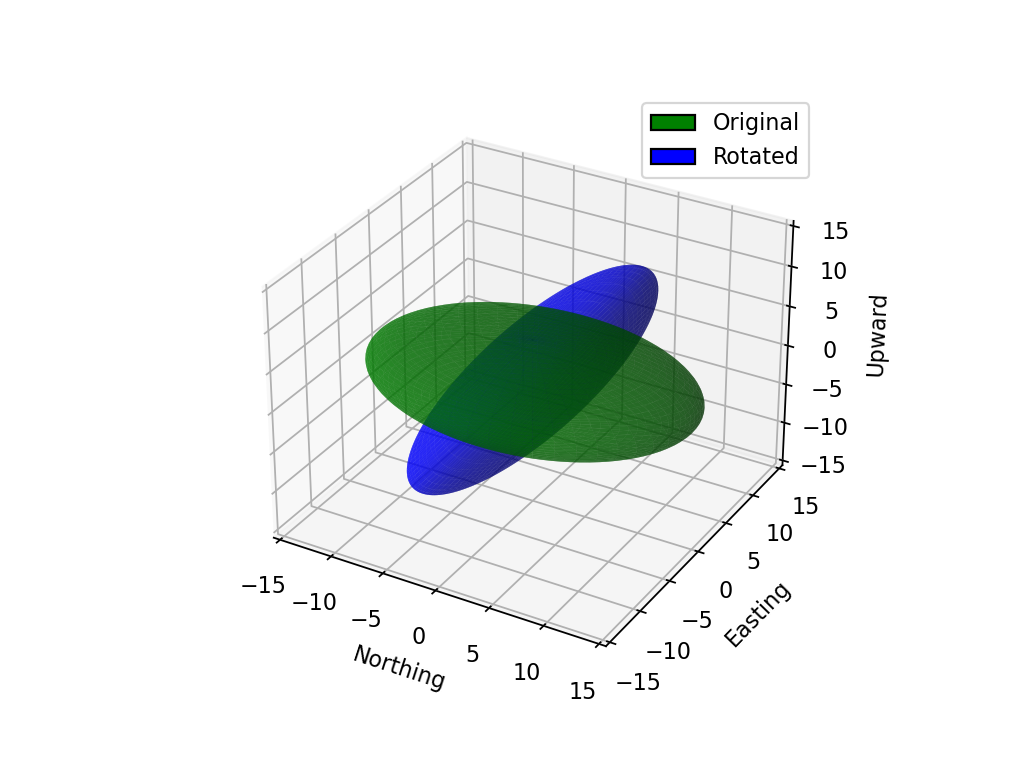

Text(0.5, 0, 'Upward')

In [3]:
%matplotlib notebook

V = fnc._get_v_as_Euler(yaw, pitch, roll) # Euler rotation matrix
x1, y1, z1 = fnc._generate_basic_ellipsoid(a, b, c) # creates ellipsoid surface
local_coords = fnc._global_to_local(x1, y1, z1, 0, V) # rotates ellipsoid surface

# plot interactive figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

max_radius = max(a, b, c)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))
    
ax.plot_surface(x1, y1, z1, color='green', alpha=0.6)
ax.plot_surface(local_coords[0], local_coords[1], local_coords[2], color='blue', alpha=0.6)

legend_elements = [
    Patch(facecolor='green', edgecolor='k', label='Original'),
    Patch(facecolor='blue', edgecolor='k', label='Rotated')
]
ax.legend(handles=legend_elements)

ax.set_xlabel('Northing')
ax.set_ylabel('Easting')
ax.set_zlabel('Upward')

## 2. Physical properties


Forward modelling of gravity requires deifning the density of the body, and magnetics requires the susceptabiity (k) - a single value if isotropic, or a tensor if anisotropic - and the regional field, $H_0$.

In [4]:
# regional field
H0 = np.array([5, 5, 5])

# susceptabiity examples
anisotropic_k = [((0.1, 0.1, 0.1), (0.2, 0.2, 0.2), (0.3, 0.3, 0.3))]
isotropic_k = 0.5

density = 2000

In [5]:
# anisotropic example
be1, bn1, bu1 = fnc.ellipsoid_magnetics(coordinates, [triaxial_example], anisotropic_k, H0)

In [6]:
# isotropic example
be2, bn2, bu2 = fnc.ellipsoid_magnetics(coordinates, [triaxial_example], isotropic_k, H0)

<IPython.core.display.Javascript object>


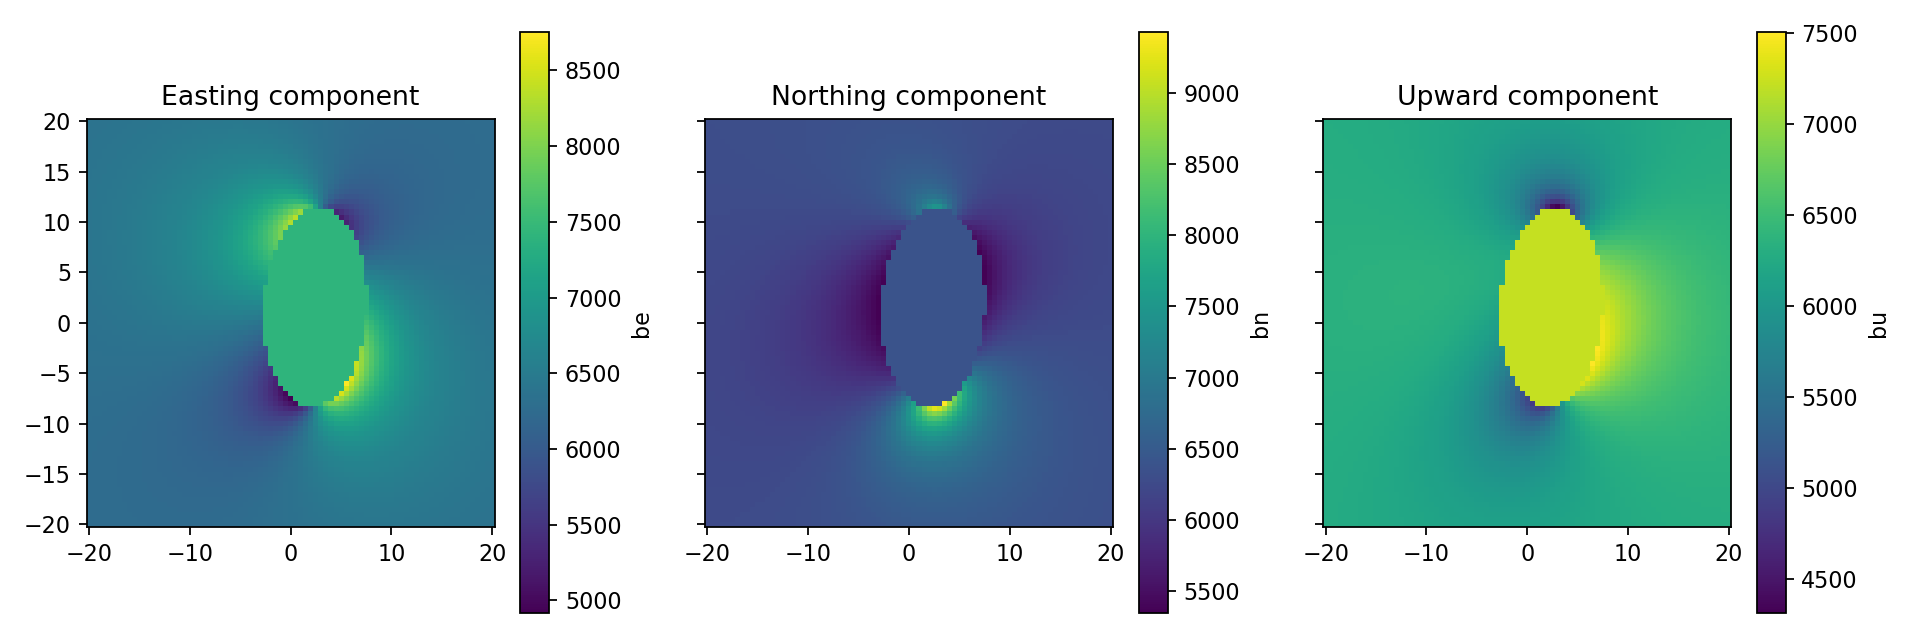

In [7]:
easting, northing = coordinates[:2]
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))

tmp = ax1.pcolormesh(easting, northing, be2)
ax1.set_title("Easting component")
plt.colorbar(tmp, ax=ax1, label="be")

tmp = ax2.pcolormesh(easting, northing, bn2)
ax2.set_title("Northing component")
plt.colorbar(tmp, ax=ax2, label="bn")

tmp = ax3.pcolormesh(easting, northing, bu2)
ax3.set_title("Upward component")
plt.colorbar(tmp, ax=ax3, label="bu")

for ax in (ax1, ax2, ax3):
    ax.set_aspect("equal")

    
plt.tight_layout()
plt.show()